In [1]:
import numpy as np
import pandas as pd

In [2]:
def synthetic_data(w,b,num):
    X=np.random.normal(0,1,(num,len(w)))
    y=np.dot(X,w)+b
    y += np.random.normal(0,1,y.shape)
    return X,y.reshape(-1,1)

true_w = [-3.4]
true_b = 4.2
X,y = synthetic_data(true_w, true_b, 1000)

pd.DataFrame(np.hstack((X,y)),columns=['X','y']).to_csv('simple.csv',index=False)


## 심플 데이터 불러오기

In [3]:
df=pd.read_csv('simple.csv')

## 심플 데이터 확인하기

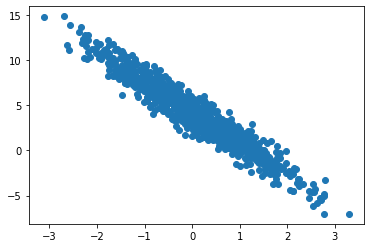

In [4]:
import matplotlib.pyplot as plt
plt.scatter(df['X'],df['y'])

In [5]:
# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras
from keras import layers

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.2


## 딥러닝 모델 만들기

In [6]:
# layer 설정
model=keras.Sequential([
    layers.Dense(1, input_shape=[1])
])
# 최적화 알고리즘 설정
optimizer = tf.keras.optimizers.RMSprop(0.01)
model.compile(optimizer=optimizer,loss='mse')

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 모델 학습

In [8]:
X=np.array(df['X'])
y=np.array(df['y'])

## 학습 히스토리 보기

Epoch 1/50
25/25 [==============================] - 1s 7ms/step - loss: 32.3515 - val_loss: 30.3178
Epoch 2/50
25/25 [==============================] - 0s 3ms/step - loss: 28.4824 - val_loss: 26.8341
Epoch 3/50
25/25 [==============================] - 0s 3ms/step - loss: 25.2101 - val_loss: 23.6177
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 22.1339 - val_loss: 20.6128
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 19.2780 - val_loss: 17.8458
Epoch 6/50
25/25 [==============================] - 0s 3ms/step - loss: 16.6922 - val_loss: 15.3443
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 14.2443 - val_loss: 12.9646
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 11.9870 - val_loss: 10.8143
Epoch 9/50
25/25 [==============================] - 0s 3ms/step - loss: 9.9819 - val_loss: 8.9161
Epoch 10/50
25/25 [==============================] - 0s 3ms/step - loss: 8.1853 - val_loss: 7.2390
Epo

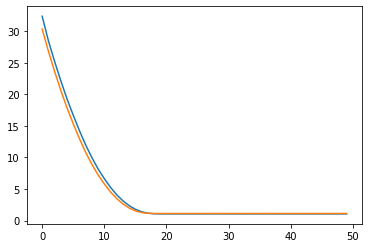

In [9]:
history = model.fit(X,y,epochs=50, validation_split=0.2)
hist = history.history
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])

## 모델이 어떻게 예측했나

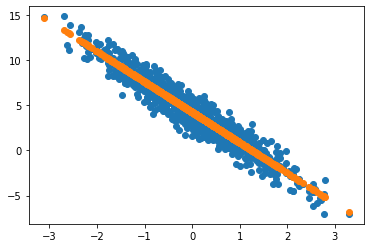

In [10]:
pred=model.predict(df['X'])
plt.scatter(df['X'],df['y'])
plt.scatter(df['X'],pred)


In [11]:
model.get_weights()

[array([[-3.3725877]], dtype=float32), array([4.2497444], dtype=float32)]